In [12]:
import numpy as np

def bisseccao(f, a, b, tol=1e-6, max_iter=100):
    fa = f(a)
    fb = f(b)
    if abs(fa) < tol:
        return a
    if abs(fb) < tol:
        return b

    if fa * fb > 0:
        raise ValueError("A função não muda de sinal no intervalo [{}, {}].".format(a, b))

    for _ in range(max_iter):
        c = (a + b) / 2.0
        fc = f(c)
        if abs(fc) < tol or (b - a) < tol:
            return c
        if fa * fc < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc
    return (a + b) / 2.0


def encontrar_zeros(f, a, b, n_subintervalos=50, tol=1e-10):

    raizes = []
    # Gera os pontos igualmente espaçados: a, a + Δx, a + 2Δx, ..., b
    x_vals = [a + i * (b - a) / n_subintervalos for i in range(n_subintervalos + 1)]
    for i in range(n_subintervalos):
        x1 = x_vals[i]
        x2 = x_vals[i + 1]
        f1 = f(x1)
        f2 = f(x2)
        # Se algum extremo estiver próximo de zero, adicione-o
        if abs(f1) < tol:
            raizes.append(x1)
        elif abs(f2) < tol:
            raizes.append(x2)

        # Se houver mudança de sinal no intervalo, aplicar bissecção
        elif f1 * f2 < 0:
            try:
                raiz = bisseccao(f, x1, x2, tol=tol)
                # print(raiz)
                raizes.append(raiz)
            except ValueError as ve:
                # Em caso de erro, pode-se registrar ou ignorar
                print("Erro no intervalo [{}, {}]: {}".format(x1, x2, ve))

    # Remover duplicatas: se duas raízes estão próximas (diferença < tol), mantém-se uma
    raizes_unicas = []
    for r in raizes:
        if not any(abs(r - ru) < tol for ru in raizes_unicas):
            raizes_unicas.append(r)

    raizes_unicas.sort()
    return raizes_unicas

def agrupar_raizes(raizes, min_dist=1e-5):
    if not raizes:
        return []
    grupos = []
    grupo_atual = [raizes[0]]
    for r in raizes[1:]:
        if abs(r - grupo_atual[-1]) < min_dist:
            grupo_atual.append(r)
        else:
            grupos.append(grupo_atual)
            grupo_atual = [r]

    grupos.append(grupo_atual)
    representantes = [sum(grupo) / len(grupo) for grupo in grupos]
    return representantes


def f3(x):
    return x**3 + x**2 - 1.5*x - 1.5


raizes_f3 = encontrar_zeros(f3, -5, 1, n_subintervalos=20, tol=1e-8)
representantes_f4 = agrupar_raizes(raizes_f3, min_dist=1e-3)
print('Representantes: ', representantes_f4)
print("Raízes encontradas:", [f"{x:.8f}" for x in raizes_f3])
representantes_formatados = [f"{r:.16f}" for r in representantes_f4]


Representantes:  [-1.224744856357574, -0.999999988079071]
Raízes encontradas: ['-1.22474486', '-0.99999999']


[0.0, 0.4, 0.8, 1.2, 1.6, 2.0, 2.4, 2.8, 3.2, 3.6, 4.0, 4.4, 4.8, 5.2, 5.6, 6.0]
[0, 3.0, 4.5, 5.8, 5.9, 5.8, 6.2, 7.4, 9.6, 15.6, 20.7, 26.7, 31.1, 35.6, 39.3, 41.5]

Matriz A:
[[1.60000000e+01 4.80000000e+01 1.98400000e+02 9.21600000e+02
  4.56478720e+03]
 [4.80000000e+01 1.98400000e+02 9.21600000e+02 4.56478720e+03
  2.35438080e+04]
 [1.98400000e+02 9.21600000e+02 4.56478720e+03 2.35438080e+04
  1.24858040e+05]
 [9.21600000e+02 4.56478720e+03 2.35438080e+04 1.24858040e+05
  6.75710239e+05]
 [4.56478720e+03 2.35438080e+04 1.24858040e+05 6.75710239e+05
  3.71358585e+06]]

Vetor b:
[258.7, 1159.04, 5697.952, 29283.6224, 154711.50592]

Determinante da matriz A = 42826921774.23579

Número de condicionamento de A (norma infinito): 48513141.16081

 A matriz é não singular, logo o sistema Ax = b pode ser resolvido.

Passo 1: Decomposição A = LU (Método de Crout)

Matriz L (Triangular Inferior):
[[  1.           0.           0.           0.           0.        ]
 [  3.           1.          

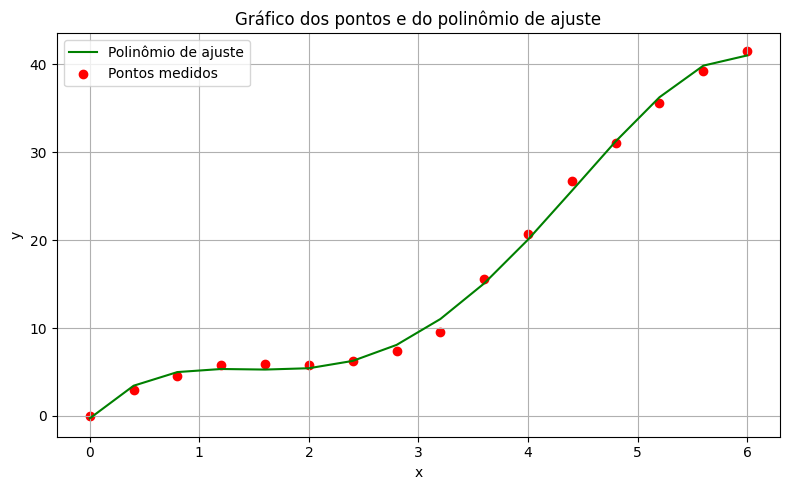

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Decomposição LU usando o método de little method
def decomposicao_LU(A):
    n = A.shape[0]
    L = np.eye(n) #matriz identidade 
    U = A.astype(float).copy()
    for i in range(n):
        if U[i, i] == 0:
            raise ValueError("A matriz A tem determinante zero, não é possível encontrar a decomposição LU.")
        for j in range(i + 1, n):
            L[j, i] = U[j, i] / U[i, i]
            U[j, :] -= L[j, i] * U[i, :]
    return L, U

# Substituição direta para resolver Ly = b
def substituicao_direta(L, b):
    n = L.shape[0] # Número de equações (ou tamanho da matriz)
    y = np.zeros(n) # Inicializa o vetor solução y com zeros
    for i in range(n):
        soma = sum(L[i, j] * y[j] for j in range(i)) # Calcula o termo já conhecido da equação
        y[i] = (b[i] - soma) / L[i, i]  # Resolve a equação isolando y[i]
    return y

# Substituição reversa para resolver Ux = y
def substituicao_reversa(U, y):
    n = U.shape[0]
    x = np.zeros(n)
    for i in reversed(range(n)):
        soma = sum(U[i, j] * x[j] for j in range(i + 1, n))
        x[i] = (y[i] - soma) / U[i, i]
    
    return x

# Cálculo da norma infinito de uma matriz (maior soma dos valores absolutos das linhas)
def norma_infinito(matriz):
    return max(np.sum(np.abs(matriz), axis=1))

# Cálculo do número de condicionamento da matriz A
def numero_de_condicionamento(A):
    A_inv = np.linalg.inv(A)
    norma_A = norma_infinito(A) #baseada na maior soma de valores absolutos por linha
    norma_A_inv = norma_infinito(A_inv)
    return norma_A * norma_A_inv

# Criando Lista com os dados de X de 0 a 6 com passo 0.4
x_dados = [round(x * 0.4, 1) for x in range(int(6 / 0.4) + 1)]
print(x_dados)

# Criando lista com os dados de Y (valores medidos)
y_dados = [0, 3.0, 4.5, 5.8, 5.9, 5.8, 6.2, 7.4, 9.6, 15.6, 20.7, 26.7, 31.1, 35.6, 39.3, 41.5]
print(y_dados)

# Inicializando os somatórios para o sistema dos mínimos quadrados
n = len(x_dados)
Sx =Sx2= Sx3= Sx4= Sx5= Sx6= Sx7= Sx8 = 0

Sy = Sxy = Sx2y = Sx3y = Sx4y = 0

# Calculando os somatórios necessários para montar a matriz do sistema
for i in range(n):
    xi = x_dados[i]
    yi = y_dados[i]
    Sx  += xi
    Sx2 += xi**2
    Sx3 += xi**3
    Sx4 += xi**4
    Sx5 += xi**5
    Sx6 += xi**6
    Sx7 += xi**7
    Sx8 += xi**8
    Sy  += yi
    Sxy += xi*yi
    Sx2y += (xi**2)*yi
    Sx3y += (xi**3)*yi
    Sx4y += (xi**4)*yi

# Montando Matriz A e vetor b para resolver o sistema normal dos mínimos quadrados
A = np.array([
    [n,   Sx,  Sx2, Sx3, Sx4],
    [Sx,  Sx2, Sx3, Sx4, Sx5],
    [Sx2, Sx3, Sx4, Sx5, Sx6],
    [Sx3, Sx4, Sx5, Sx6, Sx7],
    [Sx4, Sx5, Sx6, Sx7, Sx8]
], dtype=float)

b = [Sy, Sxy, Sx2y, Sx3y, Sx4y]

print("\nMatriz A:")
print(A)

print("\nVetor b:")
print(b)

# Calculando o determinante da matriz A
determinante = np.linalg.det(A)
print(f"\nDeterminante da matriz A = {determinante:.5f}")

# Calculando o número de condicionamento de A usando norma infinito
cond = numero_de_condicionamento(A)
print(f"\nNúmero de condicionamento de A (norma infinito): {cond:.5f}")

# Verificando se o sistema é resolvível (matriz não singular)
if abs(determinante) > 1e-10:
    print("\n A matriz é não singular, logo o sistema Ax = b pode ser resolvido.")

    # Passo 1: Decomposição LU
    print("\nPasso 1: Decomposição A = LU (Método de Crout)")
    L, U = decomposicao_LU(A)

    print("\nMatriz L (Triangular Inferior):")
    print(L)

    print("\nMatriz U (Triangular Superior com diagonal = 1):")
    print(U)

    # Passo 2: Resolver Ly = b por substituição direta
    print("\nPasso 2: Resolver Ly = b (substituição direta)")
    y = substituicao_direta(L, b)
    print("Vetor intermediário y =", y)

    # Passo 3: Resolver Ux = y por substituição reversa
    print("\nPasso 3: Resolver Ux = y (substituição reversa)")
    x = substituicao_reversa(U, y)
    x_formatado = [f"{val:.5f}" for val in x]
    print("Solução do sistema x =", x_formatado)

    # Coeficientes do polinômio de grau 4
    a0, a1, a2, a3, a4 = x
    print(f"\no polinômio encontrado é: {a4:.4f}*x⁴ + {a3:.4f}*x³ + {a2:.4f}*x² + {a1:.4f}*x + {a0:.4f}")

    # Avaliando o polinômio nos pontos de x_dados
    y_funcao = [a0 + a1 * x + a2 * x**2 + a3 * x**3 + a4 * x**4 for x in x_dados]

    # Gerando o gráfico
    plt.figure(figsize=(8, 5))
    plt.plot(x_dados, y_funcao, color='green', linestyle='-', label='Polinômio de ajuste')
    plt.scatter(x_dados, y_dados, color='red', label='Pontos medidos')
    plt.title('Gráfico dos pontos e do polinômio de ajuste')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

else:
    # Caso o sistema seja mal condicionado ou singular
    print("A matriz é singular ou quase singular e não pode ser invertida.")
    print("\n Aviso: A matriz A é mal condicionada. Pequenas variações em A ou b podem causar grandes erros na solução.")


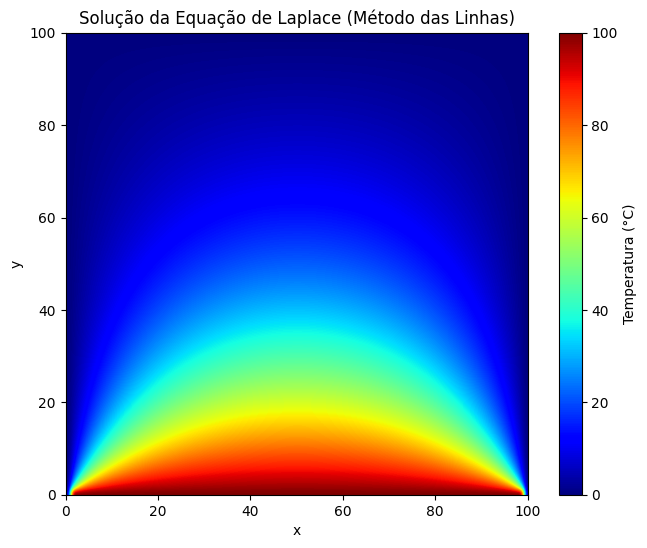

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do problema
nx, ny = 100, 100        # número de pontos na malha
max_iter = 5000       # número máximo de iterações
tolerance = 1e-6       # tolerância para convergência

# Inicializa o domínio com zeros
phi = np.zeros((ny, nx))

# Condições de contorno
phi[:, 0] = 100  # Borda esquerda
phi[:, -1] = 0   # Borda direita
phi[0, :] = 0    # Borda inferior
phi[-1, :] = 0   # Borda superior

# Método iterativo (relaxação de Jacobi)
def solve_laplace(phi, max_iter, tolerance):
    for it in range(max_iter):
        phi_old = phi.copy() # copia *todo* o array (malha) antigo
        for i in range(1, ny - 1):
            for j in range(1, nx - 1):
                phi[i, j] = 0.25 * (phi_old[i+1, j] + phi_old[i-1, j] + phi_old[i, j+1] + phi_old[i, j-1])
        # Checagem de convergência
        error = np.max(np.abs(phi - phi_old))
        if error < tolerance:
            print(f"Convergência atingida após {it} iterações com erro {error:.2e}")
            break
    return phi

# Resolver
phi = solve_laplace(phi, max_iter, tolerance)
phi_rot = phi.T
# Visualização
plt.figure(figsize=(8, 6))
plt.imshow(phi_rot, origin='lower', cmap='jet', interpolation='bicubic', extent=[0, nx, 0, ny])
plt.colorbar(label='Temperatura (°C)')
plt.title('Solução da Equação de Laplace (Método das Linhas)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [3]:
import numpy as np

# Funções fornecidas
def decomposicao_LU(A):
    n = A.shape[0]
    L = np.eye(n)
    U = A.astype(float).copy()
    for i in range(n):
        if U[i, i] == 0:
            raise ValueError("Matriz singular.")
        for j in range(i + 1, n):
            L[j, i] = U[j, i] / U[i, i]
            U[j, :] -= L[j, i] * U[i, :]
    return L, U

def substituicao_direta(L, b):
    n = L.shape[0]
    y = np.zeros(n)
    for i in range(n):
        soma = sum(L[i, j] * y[j] for j in range(i))
        y[i] = (b[i] - soma) / L[i, i]
    return y

def substituicao_reversa(U, y):
    n = U.shape[0]
    x = np.zeros(n)
    for i in reversed(range(n)):
        soma = sum(U[i, j] * x[j] for j in range(i + 1, n))
        x[i] = (y[i] - soma) / U[i, i]
    return x

# Dados de exemplo
x_dados = [round(x * 0.4, 1) for x in range(int(6 / 0.4) + 1)]
y_dados = [0, 3.0, 4.5, 5.8, 5.9, 5.8, 6.2, 7.4, 9.6, 15.6, 20.7, 26.7, 31.1, 35.6, 39.3, 41.5]

n = len(x_dados)
Sx = Sx2 = Sx3 = Sx4 = Sx5 = Sx6 = Sx7 = Sx8 = 0
Sy = Sxy = Sx2y = Sx3y = Sx4y = 0

for xi, yi in zip(x_dados, y_dados):
    Sx  += xi
    Sx2 += xi**2
    Sx3 += xi**3
    Sx4 += xi**4
    Sx5 += xi**5
    Sx6 += xi**6
    Sx7 += xi**7
    Sx8 += xi**8
    Sy  += yi
    Sxy += xi*yi
    Sx2y += (xi**2)*yi
    Sx3y += (xi**3)*yi
    Sx4y += (xi**4)*yi

A = np.array([
    [n,   Sx,  Sx2, Sx3, Sx4],
    [Sx,  Sx2, Sx3, Sx4, Sx5],
    [Sx2, Sx3, Sx4, Sx5, Sx6],
    [Sx3, Sx4, Sx5, Sx6, Sx7],
    [Sx4, Sx5, Sx6, Sx7, Sx8]
], dtype=float)
b = np.array([Sy, Sxy, Sx2y, Sx3y, Sx4y], dtype=float)

# Decomposição e substituições
L, U = decomposicao_LU(A)
y = substituicao_direta(L, b)
x = substituicao_reversa(U, y)

# Impressão dos resultados
print("Matriz L (triangular inferior):\n", L)
print("\nMatriz U (triangular superior):\n", U)
print("\nVetor intermediário y:\n", y)
print("\nSolução x:\n", x)


Matriz L (triangular inferior):
 [[  1.           0.           0.           0.           0.        ]
 [  3.           1.           0.           0.           0.        ]
 [ 12.4          6.           1.           0.           0.        ]
 [ 57.6         33.088        9.           1.           0.        ]
 [285.2992     181.056       62.62857143  12.           1.        ]]

Matriz U (triangular superior):
 [[  16.           48.          198.4         921.6        4564.7872    ]
 [   0.           54.4         326.4        1799.9872     9849.4464    ]
 [   0.            0.          146.2272     1316.0448     9158.00064   ]
 [   0.            0.            0.          371.5006464  4458.0077568 ]
 [   0.            0.            0.            0.          905.75395694]]

Vetor intermediário y:
 [ 258.7         382.94        192.432       -20.10432    -239.47117714]

Solução x:
 [ -0.27460655  12.87797959 -10.19266818   3.11854876  -0.26438877]


In [ ]:
while delta > erro:
    delta = 0.0
    for i in range(1, N):
        for j in range(1, N):
            T_old = Temp[i, j]                    # guarda só o valor antigo do ponto (i,j)
            Temp[i, j] = 0.25 * (                 # atualiza Temp *in-place*
                Temp[i+1, j] + Temp[i-1, j] +
                Temp[i, j+1] + Temp[i, j-1]
            )
            diff = abs(Temp[i, j] - T_old)        # usa T_old apenas para medir a variação local
            if diff > delta:
                delta = diff


In [ ]:
METODO DAS DIFERENCAS FINITAS, ZERO DE FUNÇÕES, MÉTODO SIR (RANGE KUTTA), DECOMPOSICAO LU